In [1]:
!pip install -U qiskit qiskit-aer qiskit-ibm-runtime


  Using cached qiskit-2.2.3-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (12 kB)
  Using cached qiskit_ibm_runtime-0.43.1-py3-none-any.whl.metadata (21 kB)
Using cached qiskit-2.2.3-cp39-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.0 MB)
Using cached qiskit_ibm_runtime-0.43.1-py3-none-any.whl (1.4 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.2.4
    Uninstalling qiskit-1.2.4:
      Successfully uninstalled qiskit-1.2.4
  Attempting uninstall: qiskit-ibm-runtime
    Found existing installation: qiskit-ibm-runtime 0.24.0
    Uninstalling qiskit-ibm-runtime-0.24.0:
      Successfully uninstalled qiskit-ibm-runtime-0.24.0


In [2]:
# Grover's Search Algorithm using Qiskit 2.x
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [3]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [4]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [5]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


In [6]:
# --- Imports ---
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# --- Helper Functions (from your original code, slightly modified) ---

def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    # Qiskit's bit ordering is from right to left (q0 is the rightmost bit)
    # We reverse the string to match this intuition, so "101" targets qubit 2=1, qubit 1=0, qubit 0=1
    for i, bit in enumerate(reversed(marked_state)):
        if bit == "0":
            qc.x(i)

    # Apply multi-controlled Z-gate (implemented as H-MCX-H)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)

    # Flip bits back
    for i, bit in enumerate(reversed(marked_state)):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser (reflection about the |s> state)."""
    qc.h(range(n))
    qc.x(range(n))

    # Apply multi-controlled Z-gate
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)

    qc.x(range(n))
    qc.h(range(n))

def run_ideal_simulation(qc, title="Ideal Simulation"):
    """Executes the circuit on an ideal simulator and plots the histogram."""
    print(f"--- Running: {title} ---")
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()

    print(f"Counts: {counts}")
    plot_histogram(counts, title=title)
    plt.show() # In Colab, plt.show() is good practice to display the plot
    return counts

print("Setup complete. Helper functions are defined.")

Setup complete. Helper functions are defined.


In [7]:
# --- Original Problem (for reference) ---
print("--- Running Original 3-Qubit Search for '101' ---")
marked_state_original = "101"
n_original = len(marked_state_original)

# Build the circuit with 1 iteration
qc_original = QuantumCircuit(n_original, n_original)
qc_original.h(range(n_original))
oracle(qc_original, n_original, marked_state_original)
diffuser(qc_original, n_original)
qc_original.measure(range(n_original), range(n_original))

# Run and plot
run_ideal_simulation(qc_original, title="Original Search for '101' (1 Iteration)")

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


--- Running Original 3-Qubit Search for '101' ---
--- Running: Original Search for '101' (1 Iteration) ---
Counts: {'100': 25, '011': 37, '111': 34, '001': 34, '110': 32, '010': 31, '000': 33, '101': 798}


{'100': 25,
 '011': 37,
 '111': 34,
 '001': 34,
 '110': 32,
 '010': 31,
 '000': 33,
 '101': 798}

# ***TASK 1***

In [8]:
# --- Task 1: Change the marked state ("001") ---
marked_state_task1_a = "001"
n_task1_a = len(marked_state_task1_a)

qc_task1_a = QuantumCircuit(n_task1_a, n_task1_a)
qc_task1_a.h(range(n_task1_a))
oracle(qc_task1_a, n_task1_a, marked_state_task1_a)
diffuser(qc_task1_a, n_task1_a)
qc_task1_a.measure(range(n_task1_a), range(n_task1_a))

run_ideal_simulation(qc_task1_a, title="Task 1: Search for '001'")

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


--- Running: Task 1: Search for '001' ---
Counts: {'100': 23, '101': 41, '110': 37, '000': 28, '010': 23, '011': 37, '111': 25, '001': 810}


{'100': 23,
 '101': 41,
 '110': 37,
 '000': 28,
 '010': 23,
 '011': 37,
 '111': 25,
 '001': 810}

In [9]:
# --- Task 1: Change the marked state ("110") ---
marked_state_task1_b = "110"
n_task1_b = len(marked_state_task1_b)

qc_task1_b = QuantumCircuit(n_task1_b, n_task1_b)
qc_task1_b.h(range(n_task1_b))
oracle(qc_task1_b, n_task1_b, marked_state_task1_b)
diffuser(qc_task1_b, n_task1_b)
qc_task1_b.measure(range(n_task1_b), range(n_task1_b))

run_ideal_simulation(qc_task1_b, title="Task 1: Search for '110'")

--- Running: Task 1: Search for '110' ---


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


Counts: {'101': 46, '111': 29, '011': 37, '001': 33, '000': 30, '010': 33, '100': 35, '110': 781}


{'101': 46,
 '111': 29,
 '011': 37,
 '001': 33,
 '000': 30,
 '010': 33,
 '100': 35,
 '110': 781}

# ***TASK 2***

In [10]:
# --- Task 2: Modify the number of qubits (4 qubits) ---
marked_state_task2 = "1011"
n_task2 = len(marked_state_task2)

qc_task2 = QuantumCircuit(n_task2, n_task2)
qc_task2.h(range(n_task2))
oracle(qc_task2, n_task2, marked_state_task2)
diffuser(qc_task2, n_task2)
qc_task2.measure(range(n_task2), range(n_task2))

run_ideal_simulation(qc_task2, title="Task 2: 4-Qubit Search for '1011' (1 Iteration)")

--- Running: Task 2: 4-Qubit Search for '1011' (1 Iteration) ---


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


Counts: {'0100': 38, '1011': 480, '0111': 35, '0011': 36, '0110': 31, '1000': 35, '0101': 40, '1001': 48, '1100': 35, '1101': 42, '1111': 40, '0001': 35, '0000': 41, '0010': 36, '1110': 19, '1010': 33}


{'0100': 38,
 '1011': 480,
 '0111': 35,
 '0011': 36,
 '0110': 31,
 '1000': 35,
 '0101': 40,
 '1001': 48,
 '1100': 35,
 '1101': 42,
 '1111': 40,
 '0001': 35,
 '0000': 41,
 '0010': 36,
 '1110': 19,
 '1010': 33}

# ***TASK 3***

In [11]:
# --- Task 3: Add multiple iterations ---
marked_state_task3 = "1011"
n_task3 = len(marked_state_task3)
N_task3 = 2**n_task3

# Calculate optimal iterations
R_task3 = int(np.floor(np.pi / 4 * np.sqrt(N_task3)))
print(f"--- Task 3: 4-Qubit Search ({N_task3} items) ---")
print(f"Optimal iterations: {R_task3}")

qc_task3 = QuantumCircuit(n_task3, n_task3)
qc_task3.h(range(n_task3)) # Initial superposition

# Apply Grover iterations (Oracle + Diffuser)
for _ in range(R_task3):
    oracle(qc_task3, n_task3, marked_state_task3)
    diffuser(qc_task3, n_task3)

qc_task3.measure(range(n_task3), range(n_task3))

run_ideal_simulation(qc_task3, title=f"Task 3: 4-Qubit Search with {R_task3} Iterations")

--- Task 3: 4-Qubit Search (16 items) ---
Optimal iterations: 3
--- Running: Task 3: 4-Qubit Search with 3 Iterations ---


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


Counts: {'1100': 2, '1011': 978, '0111': 3, '0011': 2, '1001': 6, '1000': 3, '0110': 6, '1101': 1, '0010': 3, '0000': 3, '1111': 4, '0001': 2, '1010': 4, '1110': 4, '0100': 3}


{'1100': 2,
 '1011': 978,
 '0111': 3,
 '0011': 2,
 '1001': 6,
 '1000': 3,
 '0110': 6,
 '1101': 1,
 '0010': 3,
 '0000': 3,
 '1111': 4,
 '0001': 2,
 '1010': 4,
 '1110': 4,
 '0100': 3}

# ***TASK 4***

--- Task 4: Visualizing Circuit from Task 3 ---


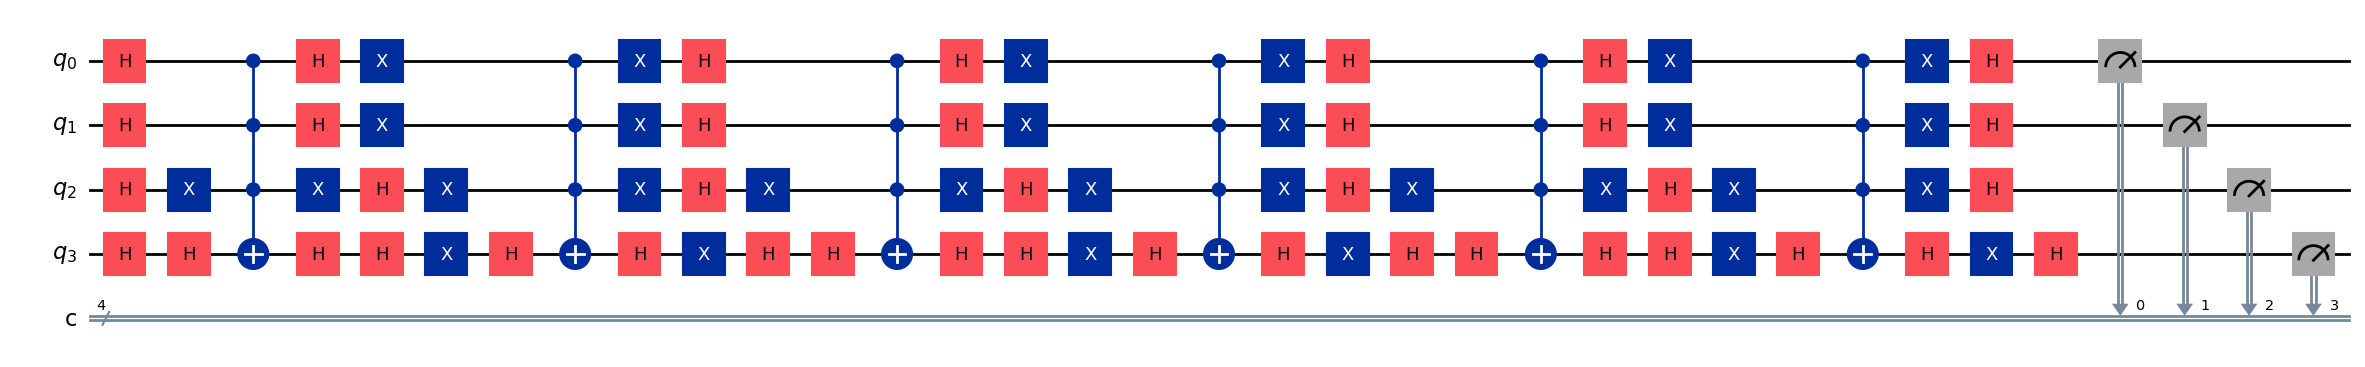

In [12]:
# --- Task 4: Circuit Visualization (Modified) ---
print("--- Task 4: Visualizing Circuit from Task 3 ---")

fig = qc_task3.draw('mpl', fold=-1)

fig

# ***TASK 5***

--- Task 5: Running with Noise (using Runtime's FakeManilaV2) ---


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


--- Running: Task 5: Ideal Run (for comparison) ---


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


Counts: {'001': 33, '010': 22, '000': 37, '011': 32, '111': 24, '110': 32, '100': 42, '101': 802}
Plotting Ideal vs. Noisy results...


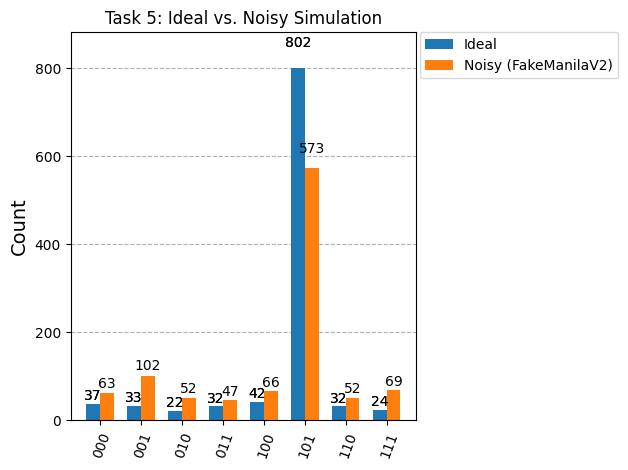

In [13]:
# --- Task 5: Experiment with Noise (Corrected Version 3) ---
try:
    from qiskit_ibm_runtime.fake_provider import FakeManilaV2
    from qiskit_aer import AerSimulator
    from qiskit_aer.noise import NoiseModel
    from qiskit import QuantumCircuit, transpile
    from qiskit.visualization import plot_histogram
    import matplotlib.pyplot as plt

    print("--- Task 5: Running with Noise (using Runtime's FakeManilaV2) ---")

    # 1. Get a mock backend (V2 is the modern version)
    backend_task5 = FakeManilaV2()

    # 2. Build a noise model from the backend's properties
    noise_model_task5 = NoiseModel.from_backend(backend_task5)

    # 3. Get coupling map and basis gates
    coupling_map_task5 = backend_task5.configuration().coupling_map
    basis_gates_task5 = backend_task5.configuration().basis_gates

    # 4. Create the noisy simulator
    noisy_simulator = AerSimulator.from_backend(backend_task5)

    # 5. We'll re-run the simple 3-qubit search ("101")
    marked_state_task5 = "101"
    n_task5 = len(marked_state_task5)

    # Check oracle/diffuser definitions
    if 'oracle' not in globals() or 'diffuser' not in globals():
        raise Exception("oracle() and diffuser() must be defined before running Task 5.")

    qc_task5 = QuantumCircuit(n_task5, n_task5)
    qc_task5.h(range(n_task5))
    oracle(qc_task5, n_task5, marked_state_task5)
    diffuser(qc_task5, n_task5)
    qc_task5.measure(range(n_task5), range(n_task5))

    # 6. Transpile for the noisy simulator
    transpiled_qc_task5 = transpile(qc_task5, noisy_simulator)

    # 7. Run and get noisy results
    result_noisy = noisy_simulator.run(transpiled_qc_task5, shots=1024).result()
    counts_noisy = result_noisy.get_counts()

    # 8. Get ideal results for comparison
    counts_ideal = run_ideal_simulation(qc_task5, title="Task 5: Ideal Run (for comparison)")

    # 9. Plot both histograms
    print("Plotting Ideal vs. Noisy results...")
    fig = plot_histogram(
    [counts_ideal, counts_noisy],
    legend=['Ideal', 'Noisy (FakeManilaV2)'],
    title="Task 5: Ideal vs. Noisy Simulation"
    )
    display(fig)


except ImportError:
    print("--- Task 5: FAILED ---")
    print("Could not import 'qiskit_ibm_runtime.fake_provider'.")
    print("Please install/update it with '!pip install qiskit-ibm-runtime -U'")
except Exception as e:
    print(f"--- Task 5: FAILED ---")
    print(f"An error occurred: {e}")


# ***TASK 6***

In [14]:
# --- Task 6: Real Hardware Execution (Corrected with Session and Sampler) ---
%matplotlib inline

import os
import matplotlib.pyplot as plt
from IPython.display import display

# Colab secrets
from google.colab import userdata

# Modern Qiskit runtime service, Session, AND the Sampler primitive
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display


print("--- Task 6: Real Hardware Execution (Qiskit Runtime Primitives) ---")

try:
    # 1) Get IBM API key from Colab Secrets
    api_key = None
    try:
        api_key = userdata.get('IBM_API_KEY')
    except Exception as e_secret:
        raise RuntimeError("Colab secret 'IBM_API_KEY' not found or access not granted. "
                           "Add it in Colab sidebar -> Secrets and grant this notebook access.") from e_secret

    if not api_key:
        raise ValueError("IBM_API_KEY empty. Please set the secret with your IBM API key in Colab.")

    # 2) Save the credentials for Qiskit Runtime
    QiskitRuntimeService.save_account(token=api_key, set_as_default=True, overwrite=True)

    # 3) Create the runtime service object
    service = QiskitRuntimeService()

    # 4) Choose a real backend
    try:
        backend_real = service.least_busy(simulator=False, min_num_qubits=5, operational=True)
    except Exception:
        backends = service.backends(simulator=False, operational=True)
        if not backends:
            raise RuntimeError("No operational real backends available for your account.")
        backend_real = backends[0]

    print(f"Selected backend: {backend_real.name}")

    # 5) Build the 3-qubit oracle/diffuser circuit
    marked_state_task6 = "101"
    n_task6 = len(marked_state_task6)

    if 'oracle' not in globals() or 'diffuser' not in globals():
        raise RuntimeError("oracle() and diffuser() are not defined. Run Cell 1.")

    qc_task6 = QuantumCircuit(n_task6, n_task6)
    qc_task6.h(range(n_task6))
    oracle(qc_task6, n_task6, marked_state_task6)
    diffuser(qc_task6, n_task6)
    qc_task6.measure(range(n_task6), range(n_task6))

    # 6) Transpile for the selected real backend
    print("Transpiling circuit for the real backend...")
    transpiled_qc_task6 = transpile(qc_task6, backend=backend_real)

    # 7) --- CHANGED ---
    #    Initialize the Session with the backend OBJECT (not its name).
    #    It will find the default service automatically.
    print("Initializing Session for the backend...")
    with Session(backend=backend_real) as session: # <--- THIS IS THE FIX
        print(f"Session initialized with ID: {session.session_id}")

        # 8) Initialize Sampler with the session
        sampler = Sampler(session=session)

        # 9) Submit job to the Sampler primitive
        print("Sending job to real hardware (using Sampler)...")
        job = sampler.run(transpiled_qc_task6, shots=1024)
        print(f"Job ID: {job.job_id()}")

        # 10) Monitor progress
        print("Waiting for job to complete...")
        job.wait_for_final_state()

        # 11) Retrieve results
        result_real = job.result()
        print("Job complete. Processing results...")

        quasi_dist = result_real.quasi_dists[0]

        # Convert quasi-distribution to standard binary probabilities
        counts_real_probs = quasi_dist.binary_probabilities(num_bits=n_task6)
        print("Probabilities from real hardware:", counts_real_probs)

        # 12) Ideal counts for comparison
        if 'run_ideal_simulation' not in globals():
            raise RuntimeError("run_ideal_simulation() not defined.")

        counts_ideal_task6 = run_ideal_simulation(qc_task6, title="Task 6: Ideal Run (for comparison)")

        # 13) Plot results
        fig = plot_histogram([counts_ideal_task6, counts_real_probs],
                             legend=['Ideal (counts)', f'Real Hardware ({backend_real.name}) (probabilities)'],
                             title=f"Task 6: Ideal vs. Real Hardware ({backend_real.name})")
        display(fig)
        plt.show()

except Exception as e:
    print("\n--- Task 6: FAILED ---")
    print(f"An error occurred: {e}")
    print("\nHints:")
    print("- Ensure you installed/updated qiskit, qiskit-aer, and qiskit-ibm-runtime and restarted the Colab runtime.")
    print("- Add your IBM API key in Colab Secrets (left sidebar → Secrets) named 'IBM_API_KEY' and grant this notebook access.")
    print("- Make sure oracle(), diffuser(), and run_ideal_simulation() are defined earlier in the notebook.")

--- Task 6: Real Hardware Execution (Qiskit Runtime Primitives) ---


qiskit_runtime_service.__init__:WARNING:2025-11-07 15:32:56,896: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-07 15:32:57,398: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-11-07 15:32:59,715: Using instance: open-instance, plan: open


Selected backend: ibm_fez
Transpiling circuit for the real backend...


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)


Initializing Session for the backend...

--- Task 6: FAILED ---
An error occurred: '400 Client Error: Bad Request for url: https://quantum.cloud.ibm.com/api/v1/sessions. {"errors":[{"code":1352,"message":"You are not authorized to run a session when using the open plan.","solution":"Create an instance of a different plan type or use a different [execution mode](https://quantum.cloud.ibm.com/docs/guides/execution-modes).","more_info":"https://cloud.ibm.com/apidocs/quantum-computing#error-handling"}],"trace":"5f0c9245-01ab-4102-9e8b-56bc440c51dd"}\n'

Hints:
- Ensure you installed/updated qiskit, qiskit-aer, and qiskit-ibm-runtime and restarted the Colab runtime.
- Add your IBM API key in Colab Secrets (left sidebar → Secrets) named 'IBM_API_KEY' and grant this notebook access.
- Make sure oracle(), diffuser(), and run_ideal_simulation() are defined earlier in the notebook.
